#### Developing a model to forecast sales of tractor for the next three years


In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

#import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\TFCLMR31\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sales_data = pd.read_csv("TractorSales.csv")
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [5]:
import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [6]:
sales_data.head()


,Month-Year,Number of Tractor Sold,Month,Year
0,3-Jan,141,Jan,2003
1,3-Feb,157,Feb,2003
2,3-Mar,185,Mar,2003
3,3-Apr,199,Apr,2003
4,3-May,203,May,2003


In [7]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]

In [8]:
sales_data.head()

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [9]:
sales_data.set_index(dates, inplace=True)

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   Year           144 non-null    int64 
 2   Tractor-Sales  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [11]:
sales_ts = sales_data['Tractor-Sales']

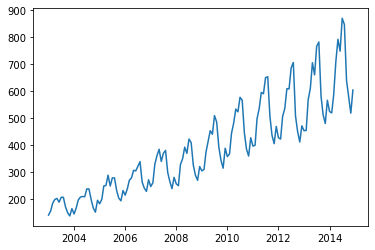

In [12]:
plt.plot(sales_ts)

In [13]:
sales_ts.rolling(window=4).mean()

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
               ...  
2014-08-01    815.25
2014-09-01    777.00
2014-10-01    735.00
2014-11-01    647.00
2014-12-01    586.25
Freq: MS, Name: Tractor-Sales, Length: 144, dtype: float64

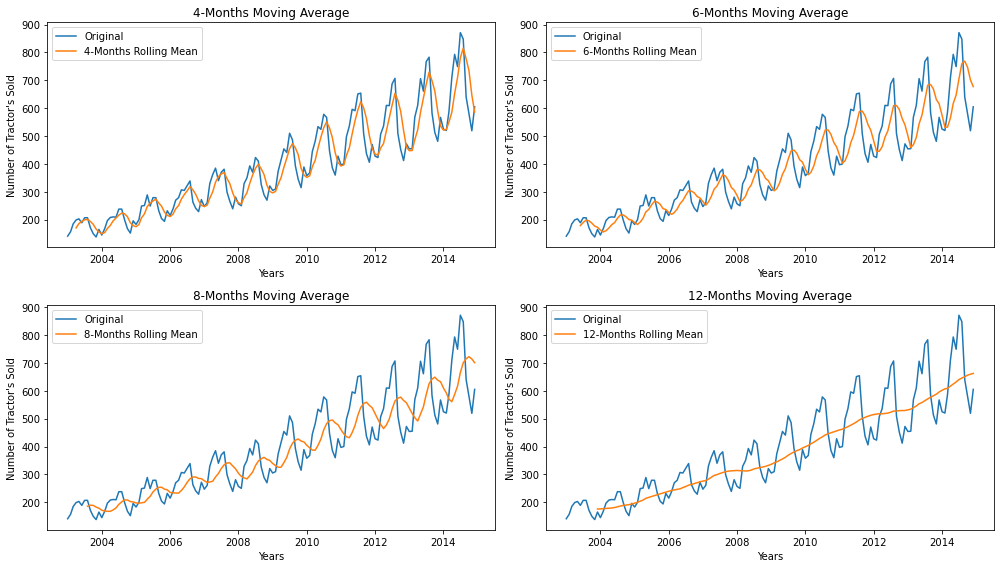

In [14]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [15]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data


Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Month'>

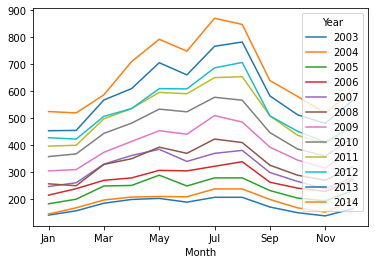

In [16]:
monthly_sales_data.plot()

In [17]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='Year'>

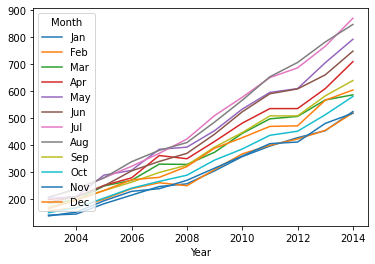

In [18]:
yearly_sales_data.plot()

<AxesSubplot:>

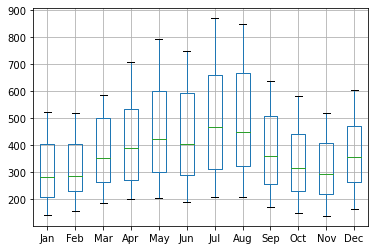

In [19]:
yearly_sales_data.boxplot()


In [20]:
import statsmodels as sm

In [21]:
decomposition = sm.tsa.seasonal.seasonal_decompose(sales_ts, model='multiplicative',two_sided=False, extrapolate_trend=4)

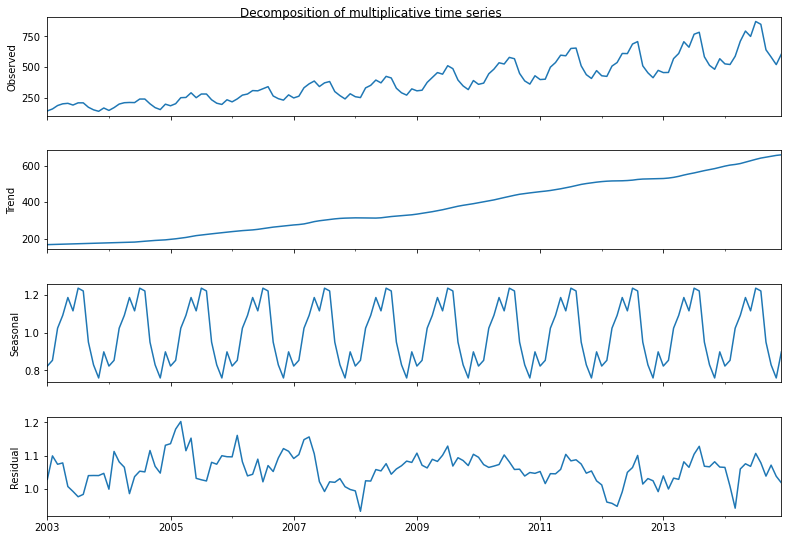

In [22]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [23]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [24]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']


In [25]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular


In [26]:
decomp_output


,observed,Trend,Seasonal,Irregular,TSI
2003-01-01,141,166.408333,0.823508,1.028907,141.0
2003-02-01,157,167.216667,0.853891,1.099557,157.0
2003-03-01,185,168.025000,1.024830,1.074350,185.0
2003-04-01,199,168.833333,1.092962,1.078424,199.0
2003-05-01,203,169.641667,1.187805,1.007438,203.0
...,...,...,...,...,...
2014-08-01,848,642.875000,1.222687,1.078833,848.0
2014-09-01,640,647.958333,0.950868,1.038754,640.0
2014-10-01,581,653.166667,0.829943,1.071776,581.0
2014-11-01,519,657.583333,0.760143,1.038297,519.0


In [27]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales_ts, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [28]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

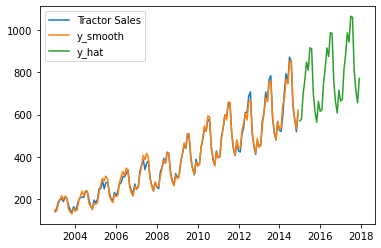

In [29]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales_ts, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()

In [30]:
#sales_ts

In [31]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [32]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


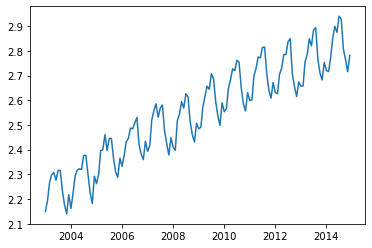

In [33]:
sales_ts_log = np.log10(sales_ts)
plt.plot(sales_ts_log)


In [34]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.732472
p-value                          0.414464
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


sales_ts.head()


sales_ts.diff(1).head()


sales_ts_diff1 = sales_ts.diff(1)
sales_ts_diff1.dropna(inplace=True)

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [35]:
sales_ts_log_diff1 = sales_ts_log.diff(1)
sales_ts_log_diff1.dropna(inplace=True)

In [36]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [37]:
sales_ts_log_diff2 = sales_ts_log.diff(2)
sales_ts_log_diff2.dropna(inplace=True)

In [38]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


<AxesSubplot:>

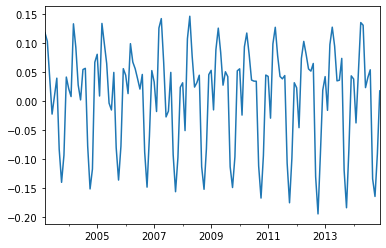

In [39]:
sales_ts_log_diff2.plot()

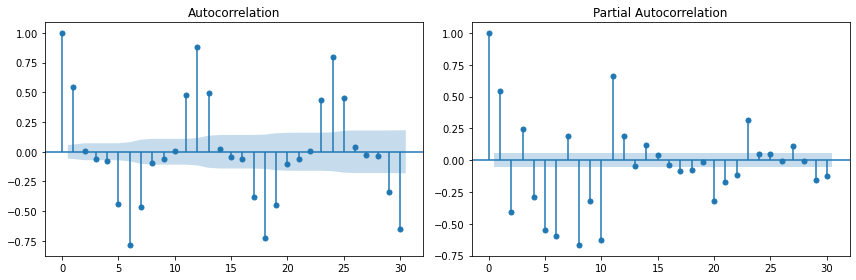

In [40]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff2, lags=30, ax=axes[1], alpha=0.5, method='ols')
plt.tight_layout()

In [44]:
import statsmodels.api as sm
sm.tsa.statespace.SARIMAX

statsmodels.tsa.statespace.sarimax.SARIMAX

In [45]:
model = sm.tsa.statespace.SARIMAX(sales_ts_log, order = (1,2,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [46]:
results = model.fit()

C:\Users\TFCLMR31\Anaconda3\lib\site-packages\statsmodels\base\model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [47]:
print(results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 12)   Log Likelihood                 329.109
Date:                            Sun, 13 Feb 2022   AIC                           -650.219
Time:                                    14:34:51   BIC                           -638.780
Sample:                                01-01-2003   HQIC                          -645.571
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3411      0.066     -5.153      0.000      -0.471      -0.211
ma.L1         -1.0000     36.615   

In [48]:
np.power(10, results.forecast(steps=36))

2015-01-01     562.972745
2015-02-01     557.568702
2015-03-01     627.453429
2015-04-01     754.698146
2015-05-01     840.390135
2015-06-01     795.457288
2015-07-01     921.070012
2015-08-01     897.830234
2015-09-01     683.791211
2015-10-01     622.850325
2015-11-01     558.541803
2015-12-01     648.259807
2016-01-01     604.801868
2016-02-01     599.402614
2016-03-01     672.326946
2016-04-01     804.372013
2016-05-01     893.068774
2016-06-01     847.078883
2016-07-01     976.776292
2016-08-01     953.245777
2016-09-01     732.414862
2016-10-01     669.323589
2016-11-01     602.472008
2016-12-01     696.296625
2017-01-01     651.261394
2017-02-01     645.871658
2017-03-01     722.155703
2017-04-01     859.534947
2017-05-01     951.593273
2017-06-01     904.410124
2017-07-01    1038.694807
2017-08-01    1014.822807
2017-09-01     786.406700
2017-10-01     720.943294
2017-11-01     651.298726
2017-12-01     749.649807
Freq: MS, dtype: float64

In [49]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [50]:
pdq

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [51]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [52]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [53]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 model - AIC:-673.292849926748


In [54]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(1, 2, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [56]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 341.646
Date:                            Sun, 13 Feb 2022   AIC                           -673.293
Time:                                    14:50:44   BIC                           -659.033
Sample:                                01-01-2003   HQIC                          -667.499
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3561      0.073     -4.873      0.000      -0.499      -0.213
ma.L1         -1.0000     64.543   

In [57]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

In [58]:
pred_dynamic.predicted_mean

2014-01-01    2.723834
2014-02-01    2.723642
2014-03-01    2.809678
2014-04-01    2.812580
2014-05-01    2.888893
2014-06-01    2.885704
2014-07-01    2.933807
2014-08-01    2.942451
2014-09-01    2.808351
2014-10-01    2.747044
2014-11-01    2.725430
2014-12-01    2.790532
Freq: MS, dtype: float64

In [71]:
np.power(10, pred_dynamic.predicted_mean)

2014-01-01    529.461052
2014-02-01    529.227561
2014-03-01    645.175547
2014-04-01    649.500731
2014-05-01    774.270381
2014-06-01    768.606986
2014-07-01    858.631301
2014-08-01    875.893682
2014-09-01    643.206833
2014-10-01    558.526212
2014-11-01    531.410242
2014-12-01    617.351038
Freq: MS, dtype: float64

In [60]:
sales_ts['2014-01-01':]

2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, dtype: int64

In [61]:
forecast = np.power(10,pred_dynamic.predicted_mean)

In [63]:
actual = sales_ts['2014-01-01':]

In [64]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [65]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.033


In [66]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 803.1497
The ROOT Mean Squared Error of our forecasts is 28.33989590665428


In [67]:
np.power(10, best_results.forecast(steps=36))

2015-01-01     564.635517
2015-02-01     562.731574
2015-03-01     668.844221
2015-04-01     756.654517
2015-05-01     854.584018
2015-06-01     815.158798
2015-07-01     937.472334
2015-08-01     932.897706
2015-09-01     698.780636
2015-10-01     620.896777
2015-11-01     565.446077
2015-12-01     662.416563
2016-01-01     616.856985
2016-02-01     614.924322
2016-03-01     731.518109
2016-04-01     828.176678
2016-05-01     935.969508
2016-06-01     892.257634
2016-07-01    1026.966341
2016-08-01    1021.665275
2016-09-01     763.413854
2016-10-01     677.553369
2016-11-01     616.454324
2016-12-01     722.857125
2017-01-01     672.611838
2017-02-01     670.322578
2017-03-01     798.268786
2017-04-01     904.370826
2017-05-01    1022.772391
2017-06-01     974.413182
2017-07-01    1122.438881
2017-08-01    1116.324866
2017-09-01     832.106208
2017-10-01     737.672112
2017-11-01     670.506906
2017-12-01     786.990508
Freq: MS, dtype: float64

In [72]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [73]:
#pred_ci_99.head()
#pred_ci_95.head()

,lower Tractor-Sales,upper Tractor-Sales
2015-01-01,2.719986,2.783551
2015-02-01,2.712329,2.788274
2015-03-01,2.779856,2.870794
2015-04-01,2.827570,2.930225
2015-05-01,2.874859,2.988650


In [74]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [75]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,564.635517,524.790094,607.506261,524.790094,607.506261
2015-01-01,562.731574,515.618738,614.149179,515.618738,614.149179
2015-02-01,668.844221,602.359197,742.667488,602.359197,742.667488
2015-03-01,756.654517,672.310375,851.579984,672.310375,851.579984
2015-04-01,854.584018,749.651497,974.204477,749.651497,974.204477


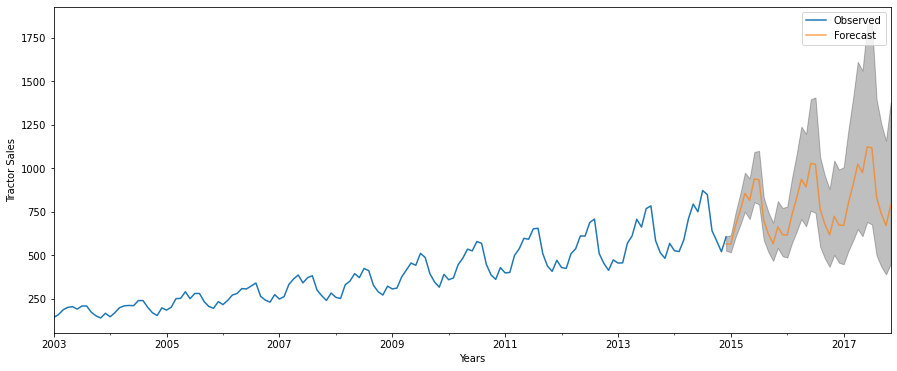

In [76]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

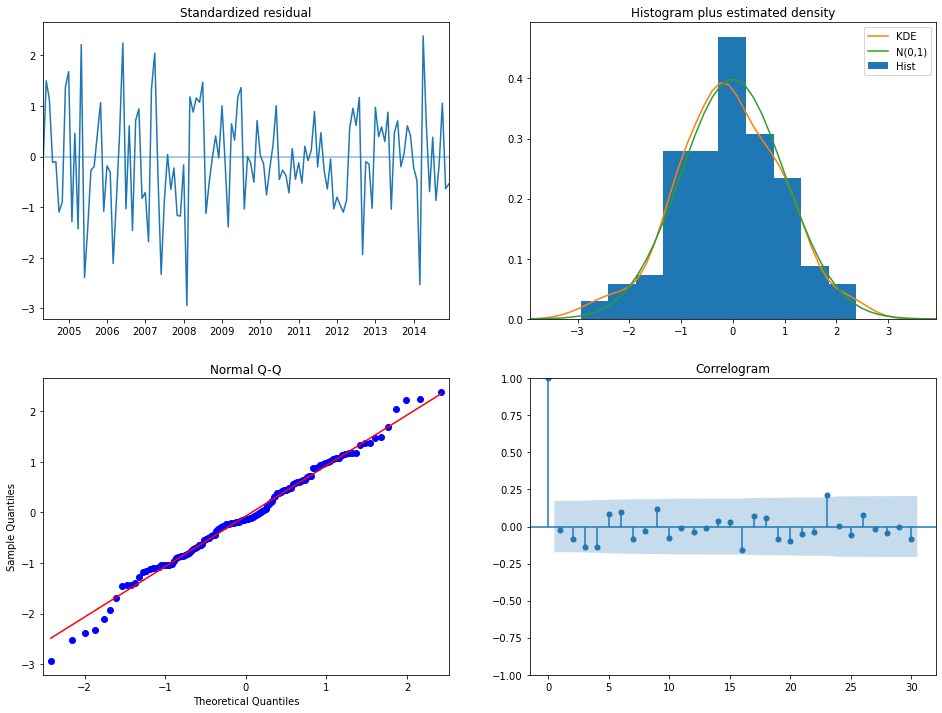

In [77]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [78]:
from fbprophet import Prophet

In [79]:
sales_data['ds'] = sales_data.index

In [80]:
sales_data = sales_data[['ds', 'Tractor-Sales']].rename(columns={'ds': 'ds', 'Tractor-Sales': 'y'})

In [81]:
#Prophet?

In [82]:
sales_model = Prophet(interval_width=0.95)
sales_model.fit(sales_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
sales_forecast = sales_model.make_future_dataframe(periods=36, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)

In [84]:
sales_forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-01,148.605933,19.916054,146.939770,148.605933,148.605933,-64.603360,-64.603360,-64.603360,-64.603360,-64.603360,-64.603360,0.0,0.0,0.0,84.002573
1,2003-02-01,151.636479,22.430790,155.375797,151.636479,151.636479,-61.273610,-61.273610,-61.273610,-61.273610,-61.273610,-61.273610,0.0,0.0,0.0,90.362869
2,2003-03-01,154.373746,90.631413,226.484986,154.373746,154.373746,2.057435,2.057435,2.057435,2.057435,2.057435,2.057435,0.0,0.0,0.0,156.431181
3,2003-04-01,157.404291,124.881953,263.362799,157.404291,157.404291,35.205689,35.205689,35.205689,35.205689,35.205689,35.205689,0.0,0.0,0.0,192.609980
4,2003-05-01,160.337077,161.088422,302.045178,160.337077,160.337077,74.462024,74.462024,74.462024,74.462024,74.462024,74.462024,0.0,0.0,0.0,234.799101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2017-08-01,808.860832,841.611008,974.856955,802.411206,815.190686,97.896765,97.896765,97.896765,97.896765,97.896765,97.896765,0.0,0.0,0.0,906.757598
176,2017-09-01,813.179194,727.991681,862.796533,806.337892,819.740877,-17.583608,-17.583608,-17.583608,-17.583608,-17.583608,-17.583608,0.0,0.0,0.0,795.595586
177,2017-10-01,817.358255,678.752773,820.757442,810.215170,824.249127,-66.536830,-66.536830,-66.536830,-66.536830,-66.536830,-66.536830,0.0,0.0,0.0,750.821425
178,2017-11-01,821.676617,662.554780,793.875062,814.277873,829.064802,-96.798800,-96.798800,-96.798800,-96.798800,-96.798800,-96.798800,0.0,0.0,0.0,724.877817


<Figure size 1296x432 with 0 Axes>

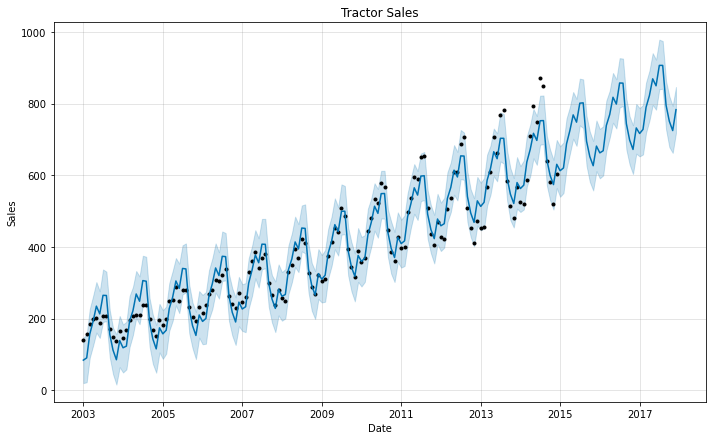

In [85]:
plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Tractor Sales');

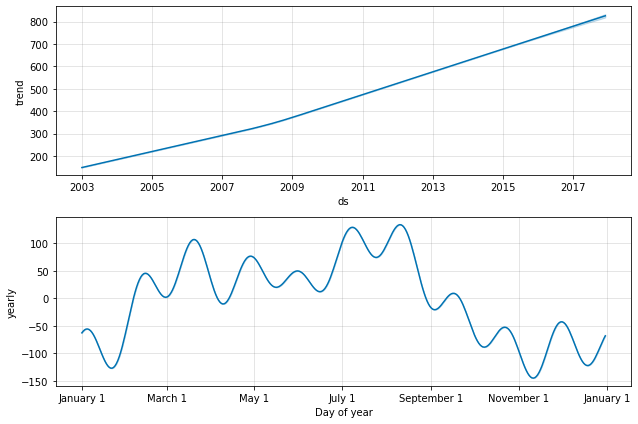

In [86]:
sales_model.plot_components(sales_forecast);